# Predicting Credit Card Defaulter using Hybrid Deep Learning Model(SOM and Artifical NN) 

## Part 1 - Identify the Frauds with the Self-Organizing Map

In [18]:
# -*- coding: utf-8 -*-

# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [2]:
import os
cwd = os.getcwd()
file_name = "Credit_Card_Applications.csv"
data = pd.read_csv(cwd+"/"+file_name)

print(data.head(10))
# print(data.describe())

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


   CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
5    15571121   0  15.83   0.585   2   8   8  1.500   1   1    2    0    2   
6    15726466   1  17.42   6.500   2   3   4  0.125   0   0    0    0    2   
7    15660390   0  58.67   4.460   2  11   8  3.040   1   1    6    0    2   
8    15663942   1  27.83   1.000   1   2   8  3.000   0   0    0    0    2   
9    15638610   0  55.75   7.080   2   4   8  6.750   1   1    3    1    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  
5  100   

## Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)


## Traning SOM

In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15)
som.random_weights_init(X)
som.train_random(data =X , num_iteration=100)

## Finding Distance from Best Maching Units to find the Outliers(fraud Customers)

In [5]:
cnt=0
threshold_distance = 0.9
list_som_distance = som.distance_map()
outlier_cordinator = []
outlier_distance = []
for i in range(0,len(list_som_distance)):
    for j in range(0,len(list_som_distance[i])):
        if (list_som_distance[i][j]> threshold_distance) :
            cnt+=1
            outlier_cordinator.append((i,j))
            outlier_distance.append(list_som_distance[i][j])

print("\nCount of outliner", cnt)
print("\nOutlier distance", outlier_distance)
print("\nOutlier Cordinates", outlier_cordinator)


Count of outliner 5

Outlier distance [1.0, 0.989104647339239, 0.9320621783068647, 0.9294316856843362, 0.9160942600160343]

Outlier Cordinates [(4, 2), (5, 2), (7, 7), (7, 8), (8, 7)]


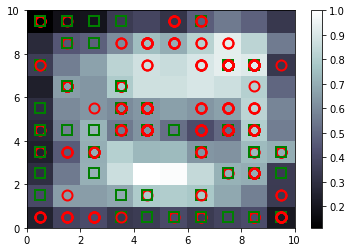

In [6]:
# Visualising Result
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()

marker = ['o', 's']
color = ['r', 'g']
dict_map=dict()
for i, x in enumerate(X):
    w = som.winner(x)
    # if w in outlier_cordinator :
    plot(w[0] + 0.5,
         w[1] +0.5,
         marker[y[i]],
         markeredgecolor = color[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
         )

plt.show()

## Finding Fraud Customers

In [7]:
fraud_customer=[]
mapping = som.win_map(X)
cnt=0
for key, value in mapping.items():
    if key in outlier_cordinator:
        cnt+=1
        # First fraud customer attribute
        if len(fraud_customer)==0:
            fraud_customer=value
        else:
            fraud_customer=np.concatenate((fraud_customer,value), axis=0)

# print("******"*100)
# print(fraud_customer)
print("Number of default cordinates", cnt)

fraud_customer = sc.inverse_transform(fraud_customer)
print("\n There are {} Fraud Customers, Customer Id for the Fraud Customers \n{}\n".format(len(fraud_customer[:,0]),
                                                                                            fraud_customer[:,0]))
print("*********END**************")

class_val = {0:'Rejected',
             1:'Approved'}
print("{:>10}{:>10}".format("CustomerID","Status"))
print("\n")
for i in fraud_customer[:,0]:
    print("{:>10}{:>10}".format(int(i), class_val[data.loc[data['CustomerID']==i,'Class'].iloc[0]]))



Number ofr default cordinates 3

 There are 50 Fraud Customers, Customer Id for the Fraud Customers 
[15739548. 15699839. 15672894. 15783883. 15756538. 15651868. 15801473.
 15728523. 15716082. 15672637. 15794204. 15734008. 15757434. 15769548.
 15742009. 15752344. 15736533. 15673907. 15737909. 15779207. 15611409.
 15752578. 15636454. 15608916. 15615296. 15805261. 15648069. 15731586.
 15705918. 15575605. 15644453. 15694666. 15646594. 15699238. 15593959.
 15629750. 15675926. 15592999. 15577771. 15593834. 15599272. 15660528.
 15711299. 15721504. 15666096. 15609758. 15611682. 15618258. 15761158.
 15609987.]

*********END**************
CustomerID    Status


  15739548  Rejected
  15699839  Rejected
  15672894  Rejected
  15783883  Rejected
  15756538  Rejected
  15651868  Rejected
  15801473  Rejected
  15728523  Rejected
  15716082  Rejected
  15672637  Rejected
  15794204  Rejected
  15734008  Rejected
  15757434  Approved
  15769548  Rejected
  15742009  Rejected
  15752344  Rejected
  1

# PART 2 : Creating Supervised Model from Unsupervised input

In [8]:
# 1. Independent Variables

customers = data.iloc[:, 1:].values

# 2. Dependent Variable

is_fraud = np.zeros(len(data))

for i in range(len(data)):
    if data.iloc[i,0] in fraud_customer[:,0]:
        is_fraud[i]= 1
#print(is_fraud)


##  ANN Part
## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Part 2 - Now let's make the ANN!

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dropout(0.2))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])





## Fitting the ANN to the Training set

In [11]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 1ms/step - loss: 0.5071 - acc: 0.9261
Epoch 2/10
690/690 [==============================] - 0s 667us/step - loss: 0.2748 - acc: 0.9275
Epoch 3/10
690/690 [==============================] - 0s 665us/step - loss: 0.2426 - acc: 0.9275
Epoch 4/10
690/690 [==============================] - 0s 670us/step - loss: 0.2315 - acc: 0.9275
Epoch 5/10
690/690 [==============================] - 0s 673us/step - loss: 0.2187 - acc: 0.9275
Epoch 6/10
690/690 [==============================] - 0s 663us/step - loss: 0.2069 - acc: 0.9275
Epoch 7/10
690/690 [==============================] - 0s 667us/step - loss: 0.2060 - acc: 0.9275
Epoch 8/10
690/690 [==============================] - 0s 660us/step - loss: 0.1966 - acc: 0.9275
Epoch 9/10
690/690 [==============================] - 0s 676us/step - loss: 0.1911 - acc: 0.9275
Epoch 10/10
690/690 [==============================] - 0s 657us/step - loss: 0.1871 - acc: 0.9275


## Predicting the probabilities of frauds


In [12]:
y_pred = classifier.predict(customers)
customer_prob = np.concatenate((data.iloc[:, 0:1].values, y_pred ), axis =1)
customer_prob = customer_prob[customer_prob[:, 1].argsort()[::-1]]


In [13]:
print("{:>10}{:>20}".format("Customer Id", "PE of default"))
for i in customer_prob:
    
    print("{:>10}{:>20}".format(int(i[0]), round(i[1]*100,3)))

Customer Id       PE of default
  15736533              23.442
  15593834              23.442
  15716082              23.442
  15728523              23.442
  15699839              23.442
  15644453              23.442
  15737909              23.442
  15769548              23.442
  15577771              23.442
  15609987              23.442
  15593959              23.442
  15675926              23.442
  15801473              23.442
  15757434              23.442
  15651868              23.442
  15646594              23.442
  15648069              23.442
  15611682              23.442
  15731586              23.442
  15660528              23.442
  15794204              23.442
  15752344              23.442
  15705918              23.442
  15609758              23.442
  15699238              23.442
  15783883              23.442
  15711299              23.442
  15611409              23.442
  15608916              23.442
  15756538              23.442
  15739548              23.442
  15742

# Conclusion 

This is very small dataset but the above result shows the customer IDs along with Probability of likely hood that these customers will default. Bank can set the PE threshold according to their bank requirement needs.